# PDF of sentinel data
# sentinel-2 urban (area of Kraków):

Found bands: {'B04': '/home/scoora/studies/ml/ML_for_space_tech/data/S2A_MSIL2A_20241018T095031_N0511_R079_T34UDA_20241018T124947.SAFE/GRANULE/L2A_T34UDA_A048696_20241018T095240/IMG_DATA/R10m/T34UDA_20241018T095031_B04_10m.jp2', 'B03': '/home/scoora/studies/ml/ML_for_space_tech/data/S2A_MSIL2A_20241018T095031_N0511_R079_T34UDA_20241018T124947.SAFE/GRANULE/L2A_T34UDA_A048696_20241018T095240/IMG_DATA/R10m/T34UDA_20241018T095031_B03_10m.jp2', 'B02': '/home/scoora/studies/ml/ML_for_space_tech/data/S2A_MSIL2A_20241018T095031_N0511_R079_T34UDA_20241018T124947.SAFE/GRANULE/L2A_T34UDA_A048696_20241018T095240/IMG_DATA/R10m/T34UDA_20241018T095031_B02_10m.jp2'}


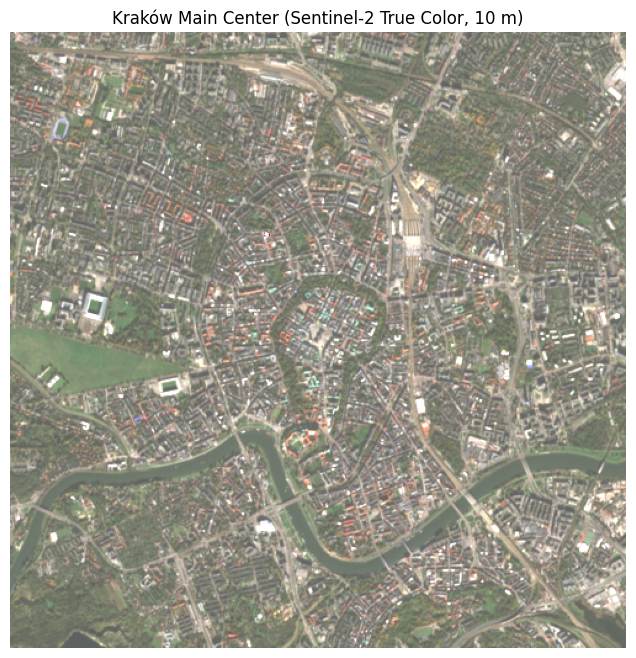

In [1]:
import glob
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.windows import from_bounds
from pyproj import Transformer
##path to the 10m bands 
folder = "/home/scoora/studies/ml/ML_for_space_tech/data/S2A_MSIL2A_20241018T095031_N0511_R079_T34UDA_20241018T124947.SAFE/GRANULE/L2A_T34UDA_A048696_20241018T095240/IMG_DATA/R10m/"
##paths to the r g and b bands 
band_paths = {b: glob.glob(f"{folder}/*_{b}_10m.jp2")[0] for b in ["B04", "B03", "B02"]}
print("Found bands:", band_paths)
##now we prepare to crop the image to a smaller area of interest 
lon, lat = 19.93722, 50.06143   # Rynek Główny coordinates
#we transform the image to easier pick the area of interest, we just take the lat lon of center of Krakow and ad 2500 m to each side 
transformer = Transformer.from_crs("EPSG:4326", "EPSG:32634", always_xy=True)
x, y = transformer.transform(lon, lat)
dx = 2500   
dy = 2500   
xmin, ymin, xmax, ymax = x - dx, y - dy, x + dx, y + dy

## healper functions to load only the cropped area of interest instead of whole image 
def read_crop(path, bounds):
    with rasterio.open(path) as src:
        window = from_bounds(*bounds, transform=src.transform)
        data = src.read(1, window=window)
    return data
##crop each band
b4_crop_urban = read_crop(band_paths["B04"], (xmin, ymin, xmax, ymax))  # Red
b3_crop_urban = read_crop(band_paths["B03"], (xmin, ymin, xmax, ymax))  # Green
b2_crop_urban = read_crop(band_paths["B02"], (xmin, ymin, xmax, ymax))  # Blue

#stack normalize and exclude outliers
rgb_crop = np.dstack((b4_crop_urban, b3_crop_urban, b2_crop_urban)).astype(np.float32)
rgb_crop /= np.percentile(rgb_crop, 99)
rgb_crop = np.clip(rgb_crop, 0, 1)
#and we plot the results
plt.figure(figsize=(8, 8))
plt.imshow(rgb_crop)
plt.title("Kraków Main Center (Sentinel-2 True Color, 10 m)")
plt.axis("off")
plt.show()


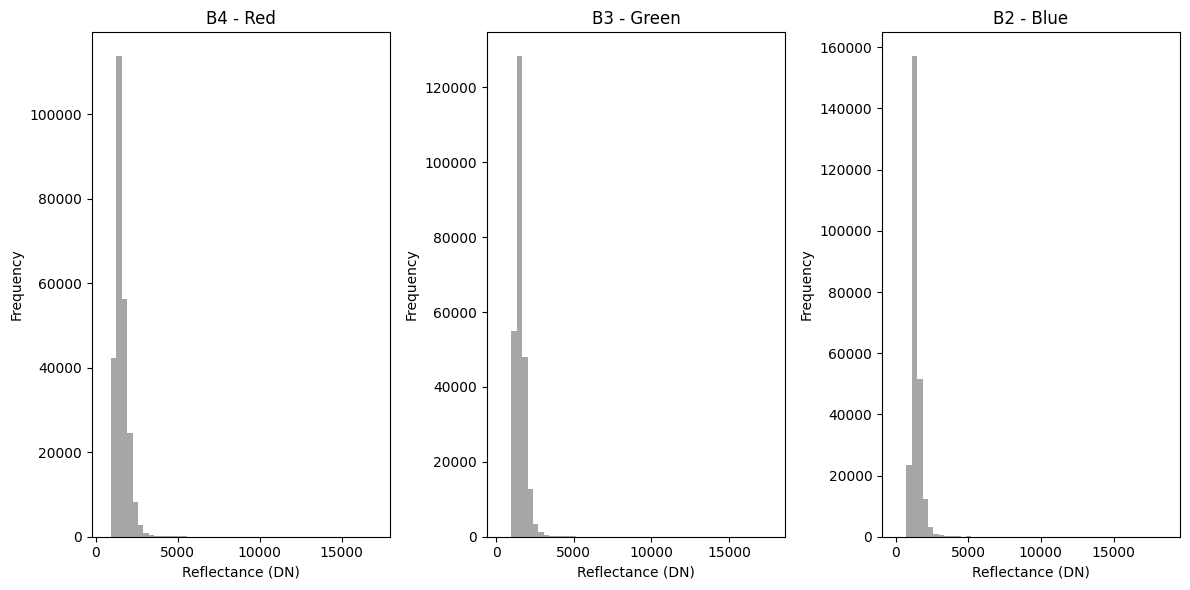

In [2]:
bands = [b4_crop_urban, b3_crop_urban, b2_crop_urban]
names = ["B4 - Red", "B3 - Green", "B2 - Blue"]


plt.figure(figsize=(12, 6))
for i, (band, name) in enumerate(zip(bands, names)):
    plt.subplot(1, 3, i+1)
    plt.hist(band.flatten(), bins=50, color="gray", alpha=0.7)
    plt.title(name)
    plt.xlabel("Reflectance (DN)")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Natural area (part of Puszcza Niepołomicka forest):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.59949464..2.7795324].


Found bands: {'B04': '/home/scoora/studies/ml/ML_for_space_tech/data//S2A_MSIL2A_20241018T095031_N0511_R079_T34UDA_20241018T124947.SAFE/GRANULE/L2A_T34UDA_A048696_20241018T095240/IMG_DATA/R10m/T34UDA_20241018T095031_B04_10m.jp2', 'B03': '/home/scoora/studies/ml/ML_for_space_tech/data//S2A_MSIL2A_20241018T095031_N0511_R079_T34UDA_20241018T124947.SAFE/GRANULE/L2A_T34UDA_A048696_20241018T095240/IMG_DATA/R10m/T34UDA_20241018T095031_B03_10m.jp2', 'B02': '/home/scoora/studies/ml/ML_for_space_tech/data//S2A_MSIL2A_20241018T095031_N0511_R079_T34UDA_20241018T124947.SAFE/GRANULE/L2A_T34UDA_A048696_20241018T095240/IMG_DATA/R10m/T34UDA_20241018T095031_B02_10m.jp2'}


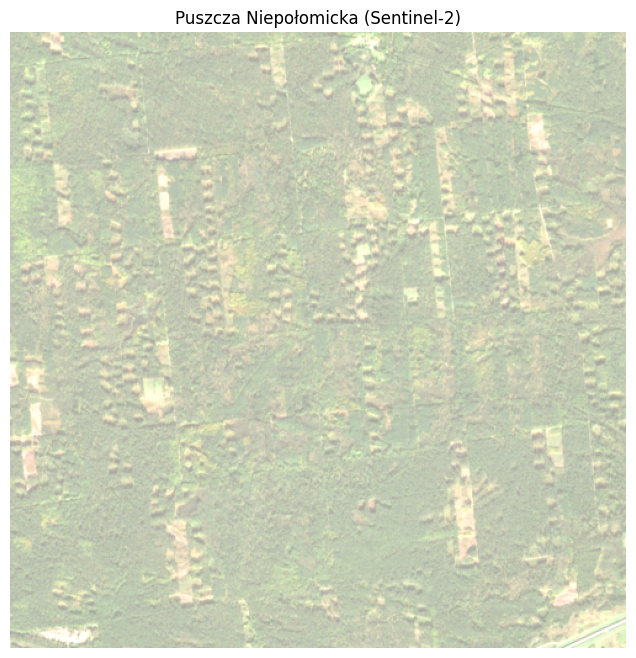

In [3]:
import glob
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.windows import from_bounds
from pyproj import Transformer

folder = "/home/scoora/studies/ml/ML_for_space_tech/data//S2A_MSIL2A_20241018T095031_N0511_R079_T34UDA_20241018T124947.SAFE/GRANULE/L2A_T34UDA_A048696_20241018T095240/IMG_DATA/R10m/"

band_paths = {b: glob.glob(f"{folder}/*_{b}_10m.jp2")[0] for b in ["B04", "B03", "B02"]}
print("Found bands:", band_paths)
lon, lat = 20.3591, 50.0197   # Puszcza Niepołomicka
transformer = Transformer.from_crs("EPSG:4326", "EPSG:32634", always_xy=True)
x, y = transformer.transform(lon, lat)
dx = 2500   
dy = 2500
xmin, ymin, xmax, ymax = x - dx, y - dy, x + dx, y + dy
def read_crop(path, bounds):
    with rasterio.open(path) as src:
        window = from_bounds(*bounds, transform=src.transform)
        data = src.read(1, window=window)
    return data

b4_crop_nat   = read_crop(band_paths["B04"], (xmin, ymin, xmax, ymax))
b3_crop_nat   = read_crop(band_paths["B03"], (xmin, ymin, xmax, ymax))
b2_crop_nat = read_crop(band_paths["B02"], (xmin, ymin, xmax, ymax))
rgb = np.dstack((b4_crop_nat, b3_crop_nat, b2_crop_nat)).astype(np.float32)
rgb /= np.percentile(rgb, 99) 
rgb_clip = np.clip(rgb, 0, 1) 
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("Puszcza Niepołomicka (Sentinel-2)")
plt.axis("off")
plt.show()


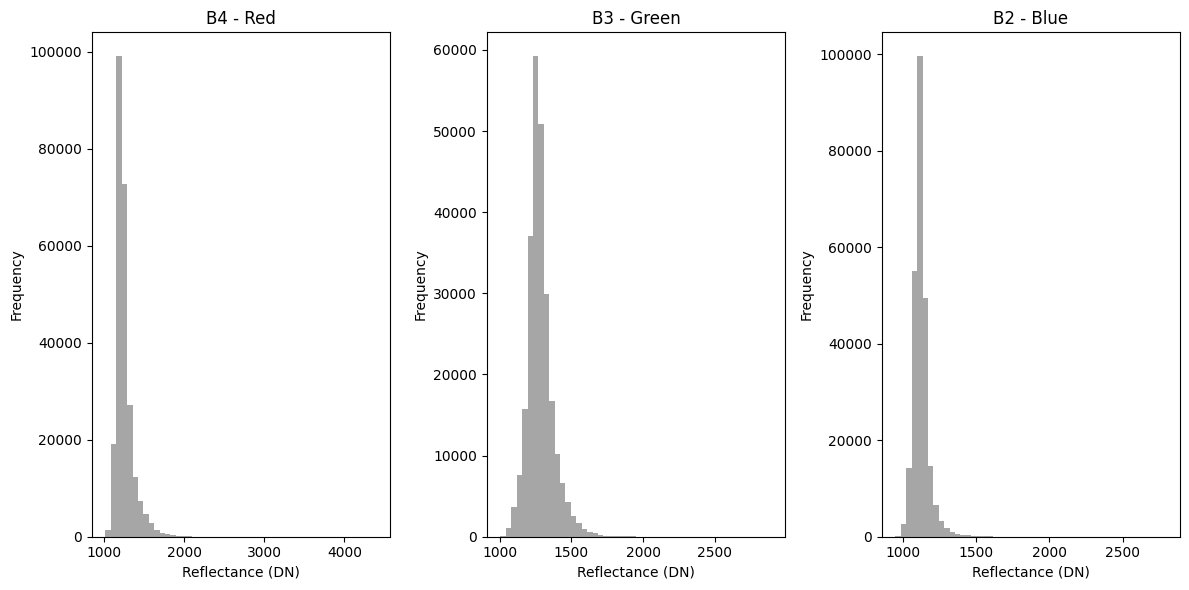

In [4]:
bands = [b4_crop_nat, b3_crop_nat, b2_crop_nat]
names = ["B4 - Red", "B3 - Green", "B2 - Blue"]


plt.figure(figsize=(12, 6))
for i, (band, name) in enumerate(zip(bands, names)):
    plt.subplot(1, 3, i+1)
    plt.hist(band.flatten(), bins=50, color="gray", alpha=0.7)
    plt.title(name)
    plt.xlabel("Reflectance (DN)")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


We can see a clear difference between value distribution in urban and forest area correlated to the coverage of the photo, the dense forest has higher reflectance across all bands due to different reflectans ability of materials than dense concrete city photo. We can also deduct that setinel data is not uniform, across all bands the distribution of values varies.


## sentinel 1 data
### urban: 

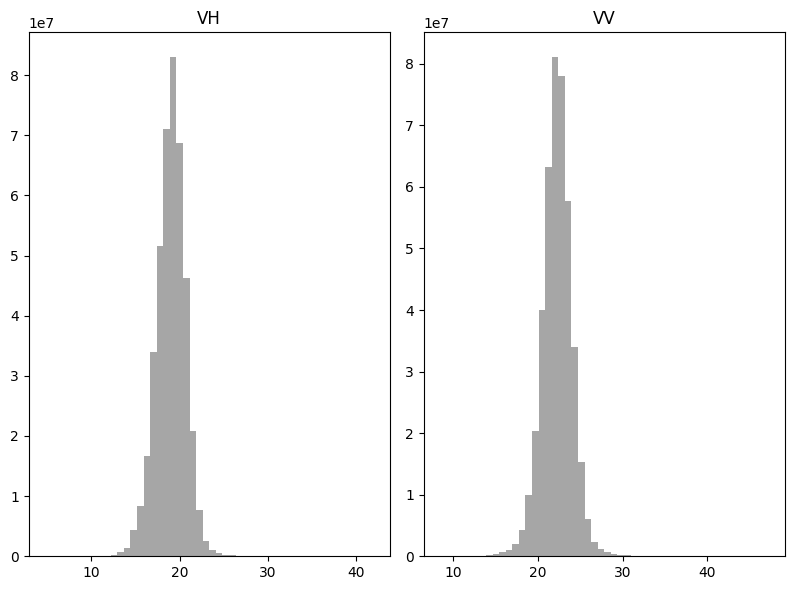

In [5]:
import rasterio
import os
import numpy as np
import matplotlib.pyplot as plt
from rasterio.windows import from_bounds, Window
from pyproj import Transformer

# Parameters of the area (same as before)
lon, lat = 19.93722, 50.06143    # krakow
dx, dy    = 2000, 2000
s1_file_vh = "/home/scoora/studies/ml/ML_for_space_tech/data/S1C_IW_GRDH_1SDV_20251001T163418_20251001T163443_004371_008A9B_B316_COG.SAFE/measurement/s1c-iw-grd-vh-20251001t163418-20251001t163443-004371-008a9b-002-cog.tiff"
s1_file_vv = "/home/scoora/studies/ml/ML_for_space_tech/data/S1C_IW_GRDH_1SDV_20251001T163418_20251001T163443_004371_008A9B_B316_COG.SAFE/measurement/s1c-iw-grd-vv-20251001t163418-20251001t163443-004371-008a9b-001-cog.tiff"


def read_window(path, lon, lat, dx, dy):
    with rasterio.open(path) as src:
        
        crs_raster = src.crs or "EPSG:4326"
        transformer = Transformer.from_crs("EPSG:4326", crs_raster, always_xy=True)

        
        x, y = transformer.transform(lon, lat)

        transform = src.transform
        W, H = src.width, src.height

        
        if abs(transform.a) < 0.001: 
            dx_deg = dx / 111320
            dy_deg = dy / 111320
        else:
            dx_deg = dx
            dy_deg = dy

        xmin, ymin, xmax, ymax = x - dx_deg, y - dy_deg, x + dx_deg, y + dy_deg

       
        try:
            win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)
        except Exception:
           
            rleft, rbottom, rright, rtop = src.bounds.left, src.bounds.bottom, src.bounds.right, src.bounds.top
            xmin = max(xmin, rleft)
            xmax = min(xmax, rright)
            ymin = max(ymin, rbottom)
            ymax = min(ymax, rtop)
            if xmin >= xmax or ymin >= ymax:
                
                win = Window(0, 0, W, H)
            else:
                win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)

       
        col_off = int(np.floor(win.col_off))
        row_off = int(np.floor(win.row_off))
        width = int(np.ceil(win.width))
        height = int(np.ceil(win.height))

        col_off = max(0, min(col_off, max(0, W - 1)))
        row_off = max(0, min(row_off, max(0, H - 1)))
        width = max(0, min(width, W - col_off))
        height = max(0, min(height, H - row_off))

        if width == 0 or height == 0:
           
            return np.empty((0, 0), dtype=np.float32), crs_raster

        win = Window(col_off, row_off, width, height)

       
        arr = src.read(1, window=win, boundless=True, fill_value=np.nan).astype(np.float32)
        arr[arr <= 0] = np.nan
        return arr, crs_raster


s1_img1, crs1 = read_window(s1_file_vh, lon, lat, dx, dy)
s1_img2, crs2 = read_window(s1_file_vv, lon, lat, dx, dy)


if s1_img1.size == 0 and s1_img2.size > 0:
    s1_img1 = np.full_like(s1_img2, np.nan)
elif s1_img2.size == 0 and s1_img1.size > 0:
    s1_img2 = np.full_like(s1_img1, np.nan)
elif s1_img1.size == 0 and s1_img2.size == 0:
    raise RuntimeError("Both loaded windows are empty. Check coordinates and input files.")


s1_db1 = 10 * np.log10(s1_img1)
s1_db2 = 10 * np.log10(s1_img2)

bands = [s1_db1, s1_db2]
names = ["VH", "VV"]


plt.figure(figsize=(12, 6))
for i, (band, name) in enumerate(zip(bands, names)):
    plt.subplot(1, 3, i+1)
    plt.hist(band.flatten(), bins=50, color="gray", alpha=0.7)
    plt.title(name)
plt.tight_layout()
plt.show()


### nature:

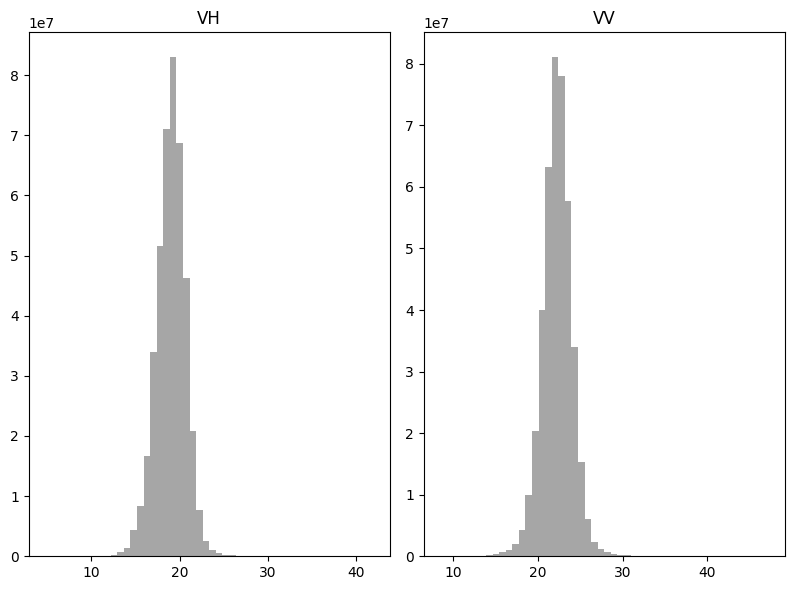

In [6]:
import rasterio
import os
import numpy as np
import matplotlib.pyplot as plt
from rasterio.windows import from_bounds, Window
from pyproj import Transformer

# Parameters of the area (same as before)
lon, lat = 20.3591, 50.0197   # krakow
dx, dy    = 2000, 2000
s1_file_vh = "/home/scoora/studies/ml/ML_for_space_tech/data/S1C_IW_GRDH_1SDV_20251001T163418_20251001T163443_004371_008A9B_B316_COG.SAFE/measurement/s1c-iw-grd-vh-20251001t163418-20251001t163443-004371-008a9b-002-cog.tiff"
s1_file_vv = "/home/scoora/studies/ml/ML_for_space_tech/data/S1C_IW_GRDH_1SDV_20251001T163418_20251001T163443_004371_008A9B_B316_COG.SAFE/measurement/s1c-iw-grd-vv-20251001t163418-20251001t163443-004371-008a9b-001-cog.tiff"


def read_window(path, lon, lat, dx, dy):
    with rasterio.open(path) as src:
        
        crs_raster = src.crs or "EPSG:4326"
        transformer = Transformer.from_crs("EPSG:4326", crs_raster, always_xy=True)

        
        x, y = transformer.transform(lon, lat)

        transform = src.transform
        W, H = src.width, src.height

        
        if abs(transform.a) < 0.001: 
            dx_deg = dx / 111320
            dy_deg = dy / 111320
        else:
            dx_deg = dx
            dy_deg = dy

        xmin, ymin, xmax, ymax = x - dx_deg, y - dy_deg, x + dx_deg, y + dy_deg

       
        try:
            win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)
        except Exception:
           
            rleft, rbottom, rright, rtop = src.bounds.left, src.bounds.bottom, src.bounds.right, src.bounds.top
            xmin = max(xmin, rleft)
            xmax = min(xmax, rright)
            ymin = max(ymin, rbottom)
            ymax = min(ymax, rtop)
            if xmin >= xmax or ymin >= ymax:
                
                win = Window(0, 0, W, H)
            else:
                win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)

       
        col_off = int(np.floor(win.col_off))
        row_off = int(np.floor(win.row_off))
        width = int(np.ceil(win.width))
        height = int(np.ceil(win.height))

        col_off = max(0, min(col_off, max(0, W - 1)))
        row_off = max(0, min(row_off, max(0, H - 1)))
        width = max(0, min(width, W - col_off))
        height = max(0, min(height, H - row_off))

        if width == 0 or height == 0:
           
            return np.empty((0, 0), dtype=np.float32), crs_raster

        win = Window(col_off, row_off, width, height)

       
        arr = src.read(1, window=win, boundless=True, fill_value=np.nan).astype(np.float32)
        arr[arr <= 0] = np.nan
        return arr, crs_raster


s1_img1, crs1 = read_window(s1_file_vh, lon, lat, dx, dy)
s1_img2, crs2 = read_window(s1_file_vv, lon, lat, dx, dy)


if s1_img1.size == 0 and s1_img2.size > 0:
    s1_img1 = np.full_like(s1_img2, np.nan)
elif s1_img2.size == 0 and s1_img1.size > 0:
    s1_img2 = np.full_like(s1_img1, np.nan)
elif s1_img1.size == 0 and s1_img2.size == 0:
    raise RuntimeError("Both loaded windows are empty. Check coordinates and input files.")


s1_db1 = 10 * np.log10(s1_img1)
s1_db2 = 10 * np.log10(s1_img2)

bands = [s1_db1, s1_db2]
names = ["VH", "VV"]


plt.figure(figsize=(12, 6))
for i, (band, name) in enumerate(zip(bands, names)):
    plt.subplot(1, 3, i+1)
    plt.hist(band.flatten(), bins=50, color="gray", alpha=0.7)
    plt.title(name)
plt.tight_layout()
plt.show()


# ex 2 Stegenography


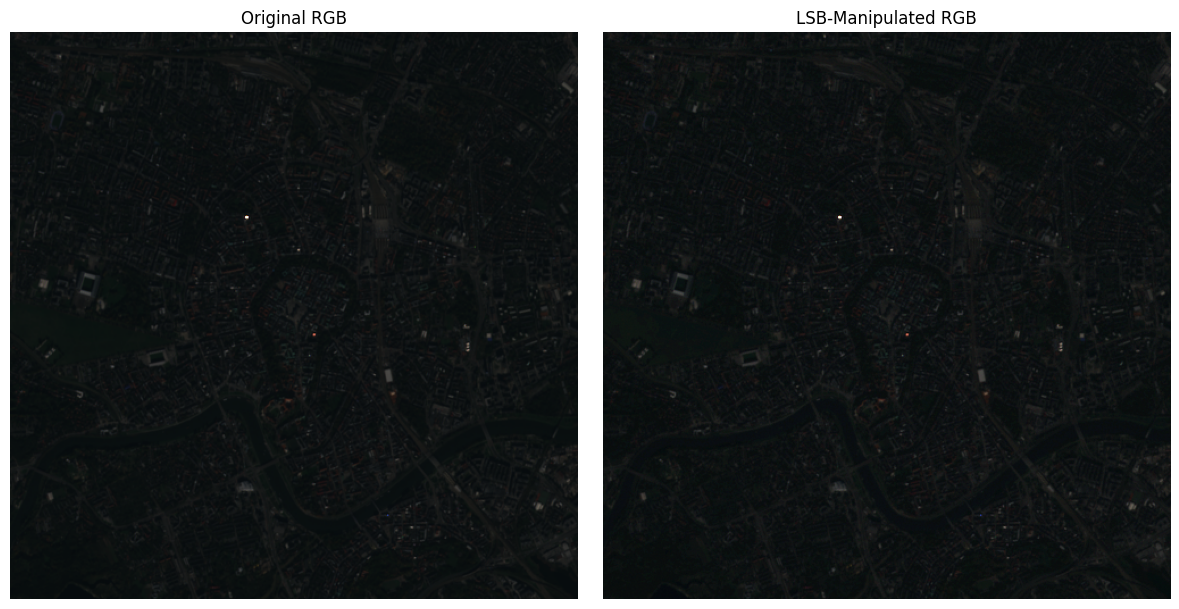

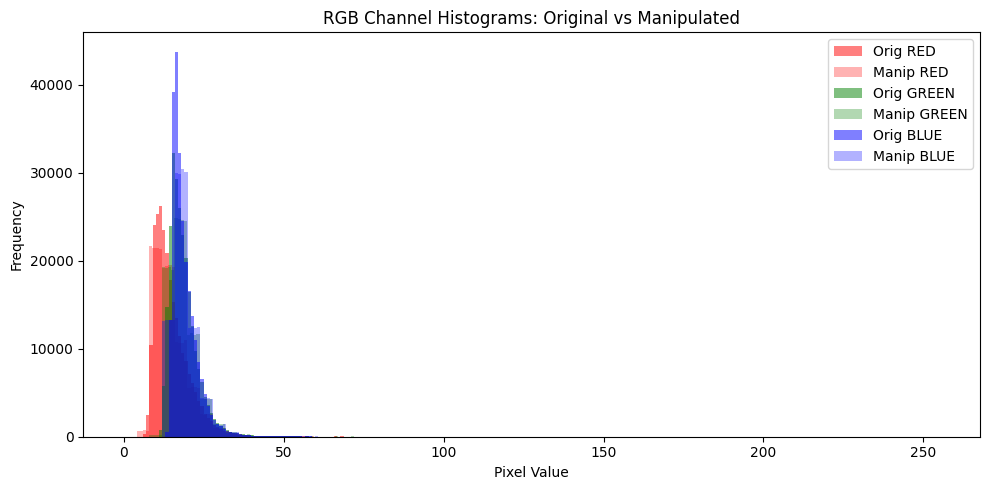

Mean pixel difference per channel: [1.239208 1.253432 1.284504]
Max pixel difference per channel: [3 3 3]
Overall mean pixel difference: 1.259048


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#  Example: Sentinel-2 true color (uint16) or any RGB image array 
# b4_crop_urban (R), b3_crop_urban (G), b2_crop_urban (B)

def normalize_to_uint8(band):
    band = band.astype(float)
    band = (band - band.min()) / (band.max() - band.min()) * 255
    return band.astype(np.uint8)

# Normalize each Sentinel-2 band to 8-bit
r = normalize_to_uint8(b4_crop_urban)
g = normalize_to_uint8(b3_crop_urban)
b = normalize_to_uint8(b2_crop_urban)

# Stack into an RGB image
rgb = np.dstack((r, g, b))

#  LSB Manipulation 
rng = np.random.default_rng()
random_bits = rng.integers(0, 4, size=rgb.shape, dtype=np.uint8)  # random 2-bit values (0-3)

# Clear last 2 bits and insert random bits
manip = (rgb & 0b11111100) | random_bits

# Visual comparison 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(manip)
plt.title("LSB-Manipulated RGB")
plt.axis("off")
plt.tight_layout()
plt.show()

# Histogram comparison per channel
colors = ["red", "green", "blue"]
plt.figure(figsize=(10,5))
for i, c in enumerate(colors):
    plt.hist(rgb[..., i].flatten(), bins=256, alpha=0.5, label=f"Orig {c.upper()}", color=c)
    plt.hist(manip[..., i].flatten(), bins=256, alpha=0.3, label=f"Manip {c.upper()}", color=c)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.title("RGB Channel Histograms: Original vs Manipulated")
plt.tight_layout()
plt.show()

# Quantitative difference 
diff = np.abs(rgb.astype(int) - manip.astype(int))
print("Mean pixel difference per channel:", diff.mean(axis=(0,1)))
print("Max pixel difference per channel:", diff.max(axis=(0,1)))
print("Overall mean pixel difference:", diff.mean())



We can see that the manipulated image seems the same to the human eye but te histogram shows difference in frequences across all bands where the manipulated values are actually higher then original ones